### some useful functions to figure out which settings to use

In [38]:
from nbodykit.cosmology import Planck15
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def a2z(a):
    return 1./a-1

def z2a(z):
    return 1./(1.+z)

In [40]:
def get_physical_width(cosmology,z_source,fov):
    """returns physical extent (comoving angular diameter distance) in Mpc/h 
    of a field of view (fov,in degrees) 
    at source redhsift z_source for a specific cosmology"""
    chi_source = cosmology.angular_diameter_distance(z_source)
    fov_rad    = fov/180.*np.pi
    width      = fov_rad*chi_source
    
    return width*(1+z_source)

In [41]:
def get_volume(z_source,FOV, cosmo):
    """
    returns the comoving volume of the lightcone in [Mpc/h]^3
    z_source: highest source redshift
    FOV: field of view in degrees (2D, in degrees)
    """
    h = cosmo.comoving_distance(z_source)
    ls= [deg/180.*np.pi*h for deg in FOV]
    V = np.prod(ls)*h/3.
    return V

In [42]:
def get_fov(cosmo,BoxSize,z_source):
    """
    get the field of view (in degrees) for given boxsize and source redshift
    """
    chi_source = cosmo.angular_diameter_distance(z_source)*(1+z_source)
    fov        = BoxSize/chi_source/np.pi*180.
    return fov

In [43]:
def get_num_boxes(cosmo, boxsize, z_source):
    """
    number of box repetitions up source redshift
    """
    h   = cosmo.comoving_distance(z_source)
    num = h/boxsize
    return num

In [44]:
cosmo_fid  = Planck15
cosmo_min  = Planck15.match(Omega0_m=0.05)
cosmo_max  = Planck15.match(Omega0_m=0.95)
boxsize    = 156
z_source   = 1.

print(get_fov(cosmo_fid,boxsize,z_source))
print(get_fov(cosmo_min,boxsize,z_source))
print(get_fov(cosmo_max,boxsize,z_source))

print(get_num_boxes(cosmo_fid,boxsize,z_source))
print(get_num_boxes(cosmo_min,boxsize,z_source))
print(get_num_boxes(cosmo_max,boxsize,z_source))

3.885479663282639
3.171171050261748
5.018371727603926
14.746127757280815
18.067703886803148
11.417205146484276


In [45]:
cosmo_fid  = Planck15
cosmo_min  = Planck15.match(Omega0_m=0.05)
cosmo_max  = Planck15.match(Omega0_m=0.95)
boxsize    = 256
z_source   = 1.

print(get_fov(cosmo_fid,boxsize,z_source))
print(get_fov(cosmo_min,boxsize,z_source))
print(get_fov(cosmo_max,boxsize,z_source))

print(get_num_boxes(cosmo_fid,boxsize,z_source))
print(get_num_boxes(cosmo_min,boxsize,z_source))
print(get_num_boxes(cosmo_max,boxsize,z_source))

6.3761717551304855
5.20397300555774
8.235276681196186
8.985921602092997
11.010007056020669
6.957359386138855


In [46]:
#cosmo_fid  = Planck15


In [47]:
#S_8 at fiducial
def S_8(Omega_m, sigma_8):
    return sigma_8*(Omega_m/0.3)**0.5

def sigma_8(Omega_m,S_8_fid):
    return S_8_fid*(Omega_m/0.3)**(-0.5)

In [48]:
S_8_fid = S_8(Planck15.Omega_m(0),Planck15.sigma8)

In [50]:
sigma_Omega=0.015

In [55]:
Omega_m_min =Planck15.Omega_m(0)-5*sigma_Omega
Omega_m_max =Planck15.Omega_m(0)+5*sigma_Omega
print(Omega_m_min,Omega_m_max)

0.2339037414433296 0.3839037414433296


In [56]:
Omega_ms = np.linspace(Omega_m_min,Omega_m_max,100)

In [57]:
sigma8s  = sigma_8(Omega_ms,S_8_fid)

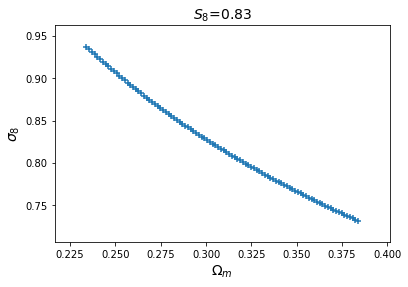

In [58]:
plt.title('$S_8$=%.2f'%S_8_fid, fontsize=14)
plt.scatter(Omega_ms,sigma8s, marker='+')
plt.ylabel('$\sigma_8$',fontsize=14)
plt.xlabel('$\Omega_m$',fontsize=14)
plt.show()

In [17]:
cosmo_min  = Planck15.match(Omega0_m=Omega_m_min)
cosmo_max  = Planck15.match(Omega0_m=Omega_m_max)
boxsize    = 256
z_source   = 1.

fov_min = get_fov(cosmo_min,boxsize,z_source)
fov_max = get_fov(cosmo_max,boxsize,z_source)

num_box_min = get_num_boxes(cosmo_min,boxsize,z_source)
num_box_max = get_num_boxes(cosmo_max,boxsize,z_source)

In [18]:
print(fov_min,fov_max)

5.7188008112880695 6.865216875890915


In [19]:
import pickle

In [20]:
path = '/global/homes/v/vboehm/codes/MADLens/run_specs/'


In [28]:
pickle.dump([fov_min,fov_max,Omega_ms,sigma8s],open(path+'S_8_small_run.pkl','wb'))

In [25]:
from scipy.interpolate import interp1d

Pk_interp =[]
for nn, (Omega_m, sigma8) in enumerate(zip(Omega_ms,sigma8s)):
    print(nn)
    cosmo = Planck15.match(Omega0_m=Omega_m)
    cosmo = cosmo.match(sigma8=sigma8)
    ks    = np.logspace(-2.5,2.5,300)
    Pk    = cosmo.get_pklin(ks,0)
    Pk_interp+=[interp1d(np.log(ks),np.log(Pk),fill_value='extrapolate')]
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


KeyboardInterrupt: 

0


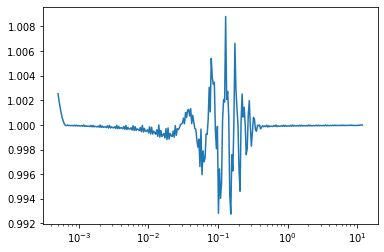

1
2
3
4
5
6
7
8
9
10


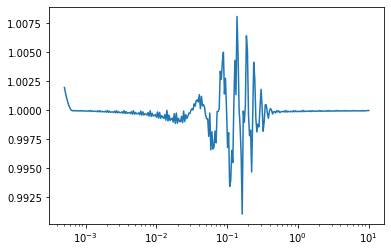

11
12
13
14
15
16
17
18
19
20


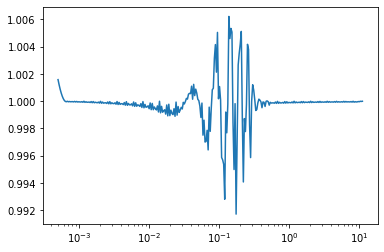

21
22
23
24
25
26
27
28
29
30


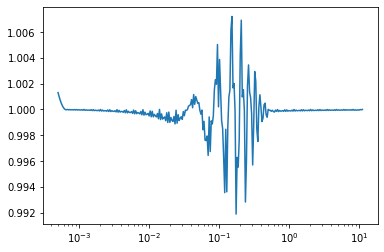

31
32
33
34
35
36
37
38
39
40


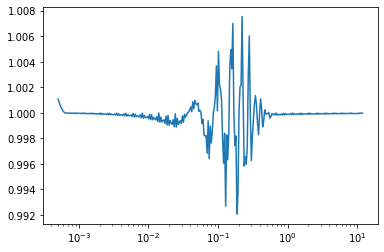

41
42
43
44
45
46
47
48
49
50


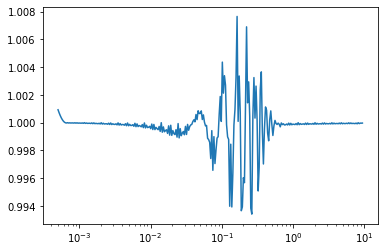

51
52
53
54
55
56
57
58
59
60


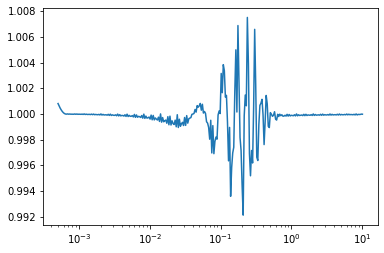

61
62
63
64
65
66
67
68
69
70


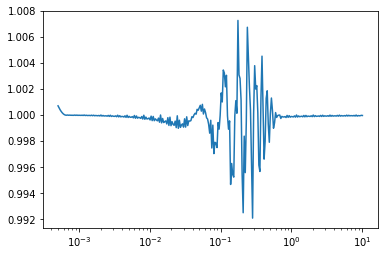

71
72
73
74
75
76
77
78
79
80


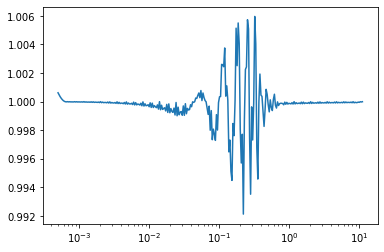

81
82
83
84
85
86
87
88
89
90


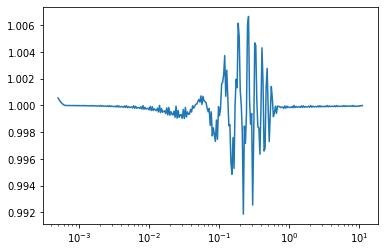

91
92
93
94
95
96
97
98
99


In [33]:
for nn, (Omega_m, sigma8) in enumerate(zip(Omega_ms,sigma8s)):
    print(nn)
    cosmo = Planck15.match(Omega0_m=Omega_m)
    cosmo = cosmo.match(sigma8=sigma8)
    ks    = np.logspace(-3.2,2.5,170)
    Pk    = cosmo.get_pklin(ks,0)
    Pk_interp+=[interp1d(np.log(ks),np.log(Pk),fill_value='extrapolate')]
    if nn%10==0:
        ks_test = np.logspace(-3.3,2.6,400)
        plt.semilogx(ks_test, np.exp(Pk_interp[-1](np.log(ks_test)))/cosmo.get_pklin(ks_test,0))
        plt.show()

In [34]:
pickle.dump([fov_min,fov_max,Omega_ms,sigma8s,ks,Pk_interp],open(path+'S_8_small_run.pkl','wb'))